3616900


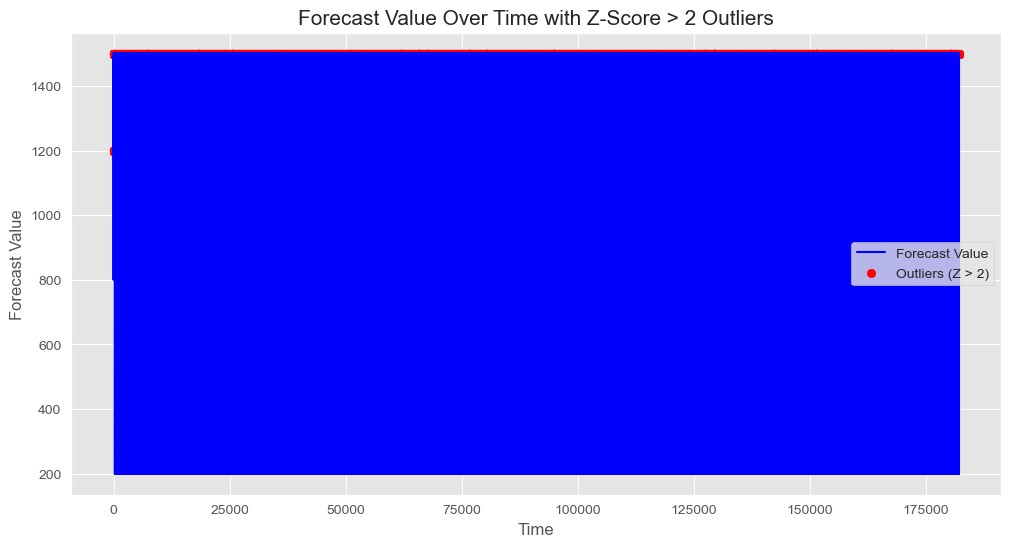

In [5]:
# 导入所需模块
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import time as Time
start = 0
end = 0
tflag = False

# 读取数据
file_path = 'web_trace.csv'  # 替换为您的文件路径
data = pd.read_csv(file_path)

if tflag != True:
        start = Time.perf_counter_ns()

# 计算forecast列的Z分数
data['Forecast_Z_Score'] = stats.zscore(data['forecast'])

# 定义离群点（这里以Z分数的绝对值大于2为标准）
data['Forecast_Outlier_Z'] = data['Forecast_Z_Score'].abs() > 1

if tflag != True:
        end = Time.perf_counter_ns()
        tflag = True
print(end - start)

# 创建折线图，并在其中标注离群点
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
# 绘制forecast值的折线图
sns.lineplot(data=data, x=data.index, y='forecast', label='Forecast Value', color='blue')

# 标注离群点
outliers = data[data['Forecast_Outlier_Z']]
plt.scatter(outliers.index, outliers['forecast'], color='red', label='Outliers (Z > 2)')

# 设置标题和标签
plt.title('Forecast Value Over Time with Z-Score > 2 Outliers', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Forecast Value', fontsize=12)
plt.legend()

# 显示图表
plt.show()


# 返回Z分数大于2的离群点的数量
# outliers_count = outliers['forecast'].count()

In [6]:
TP = 0
TN = 0
FP = 0
FN = 0


for i, x in enumerate(data['Forecast_Outlier_Z']):
    if x == True and data['label'][i] == 1:
        TP += 1
    elif x == False and data['label'][i] == 1:
        FN += 1
    elif x == True and data['label'][i] == 0:
        FP += 1
    else:
        TN += 1


acc = (TP+TN) / (TP+TN+FP+FN)
print(acc)
precision = TP / (TP + FP)
print(precision)
recall = TP / (TP + FN)
print(recall)
print(2*(precision*recall)/(precision+recall))

0.8024598490048044
0.10215325515568136
0.8996216336523482
0.18347291255305145
